In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(50, 24))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# mat1=scipy.io.loadmat('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_prep.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# print('raw_Test_data',nina_raw_test)

In [5]:
# # files.upload()
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Train.csv", nina_raw_train, delimiter=",")

In [6]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Test.csv", nina_raw_test, delimiter=",")

In [7]:
N_FEATURES = 12

In [8]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [9]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [10]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [11]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [12]:
# import os
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/'
# naveen_path
path='/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/Total_process_TT/'
# olsson_path
# path='/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_prep_nb/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/Total_process_TT/'

In [13]:
# file_path_train=path+'nina_pro_nb_DB4_Train'+'.'+'csv'
# naveen_train
file_path_train=path+'nina_pro_noprep_DB4_Train'+'.'+'csv'
# olsson_train
# file_path_train=path+'nina_olsson_nb_DB4_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/Total_process_TT/nina_pro_noprep_DB4_Train.csv


In [14]:
# file_path_test=path+'nina_pro_nb_DB4_Test'+'.'+'csv'
# naveen_test
file_path_test=path+'nina_pro_noprep_DB4_Test'+'.'+'csv'
# olsson_test
# file_path_test=path+'nina_olsson_nb_DB4_Test'+'.'+'csv'
# file_path_test=path+'Test_data'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/Total_process_TT/nina_pro_noprep_DB4_Test.csv


In [15]:
# Load data set containing all the data from csv
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 20800000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,29,-22,21,-31,57,86,77,45,23,24,62,-128,1.0
1,8,-57,33,-51,19,-31,11,-18,-33,18,90,-128,1.0
2,-45,-16,76,14,-4,-64,34,-31,26,-20,67,-128,1.0
3,-120,-3,-14,-33,49,3,42,-1,5,-69,-54,-128,1.0
4,-127,53,31,12,60,-4,8,26,11,18,-38,-128,1.0
5,-62,31,-22,-37,-31,41,17,38,-18,0,-59,-121,1.0
6,73,-33,33,52,33,79,-2,67,-27,15,-41,-128,1.0
7,32,-39,55,32,21,-24,-75,101,-13,-54,-40,-116,1.0
8,41,7,10,21,58,40,-47,11,-27,22,2,-128,1.0
9,40,-8,9,-9,31,34,-45,-40,-62,8,42,-128,1.0


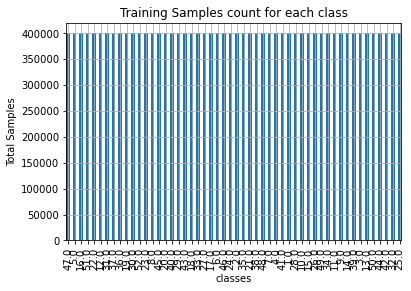

In [16]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [17]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 10400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-128,16,49,-22,110,16,39,-128,-43,-95,-61,127,1.0
1,-128,7,15,5,61,-1,62,-128,-72,-128,19,33,1.0
2,-128,42,2,12,48,-41,-78,-128,-94,-128,-41,26,1.0
3,-128,11,24,12,-8,-128,-128,127,-16,-128,16,-104,1.0
4,-128,-31,24,24,65,-115,-128,127,-113,-128,-14,-128,1.0
5,-128,10,15,40,126,77,-103,-128,-18,-128,32,-128,1.0
6,-128,79,19,13,109,127,127,-128,27,-128,10,-111,1.0
7,127,29,-11,-58,127,127,127,-128,2,-99,0,-128,1.0
8,127,19,0,-41,121,127,113,28,-56,-61,-26,-128,1.0
9,127,-72,-128,16,127,127,85,127,-61,-24,-71,-90,1.0


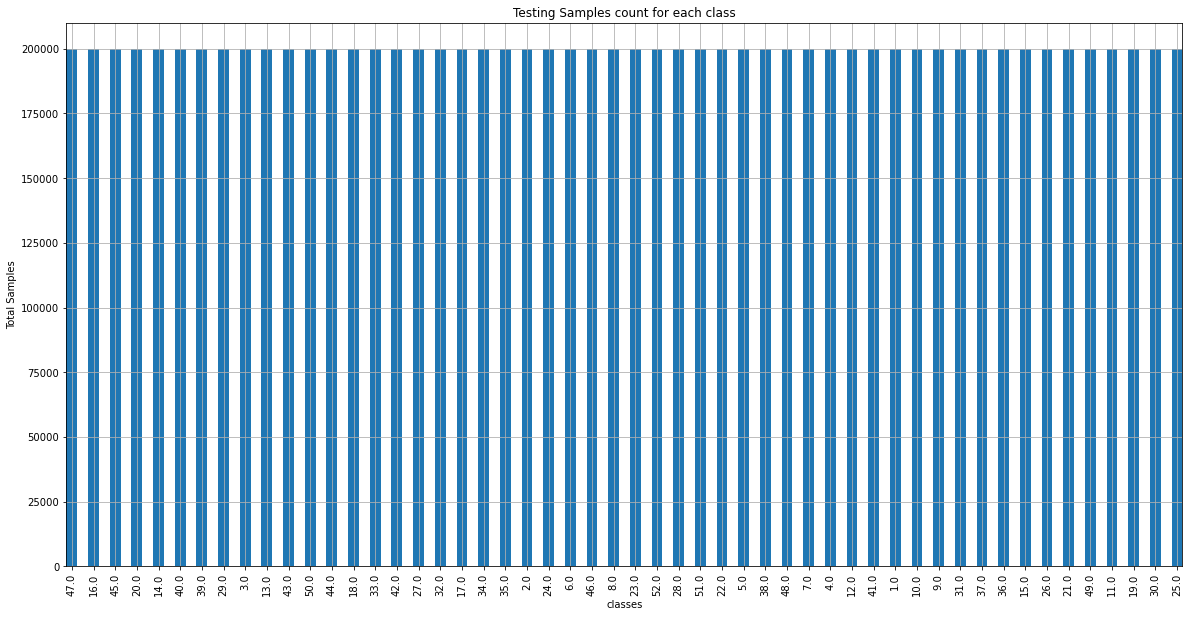

In [18]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# Better understand how the recordings are spread across the different
# users who participated in the study
#df['user-id'].value_counts().plot(kind='bar',
#                                  title='Training Examples by User')

In [19]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
print('df_test_size',df_Test)

df_train_size            C1   C2   C3   C4   C5   C6   C7   C8  C9  C10  C11  C12  \
0          29  -22   21  -31   57   86   77   45  23   24   62 -128   
1           8  -57   33  -51   19  -31   11  -18 -33   18   90 -128   
2         -45  -16   76   14   -4  -64   34  -31  26  -20   67 -128   
3        -120   -3  -14  -33   49    3   42   -1   5  -69  -54 -128   
4        -127   53   31   12   60   -4    8   26  11   18  -38 -128   
...       ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...   
20799995 -128  127  -21  127   67 -128  127  127   2  127  127   42   
20799996 -128  127  127  127   15 -128  127  127 -38  127  127  -50   
20799997   27  -20  127  127    1 -128  127   92 -27  127  127  -21   
20799998  127 -128  127  127   31   70  127   53 -78  127  127  -68   
20799999  127  127  127  127  104  127 -128  127 -62  127  127 -109   

          Class_label  ActivityEncoded  
0                 1.0                0  
1                 1.0                0  
2         

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,29,-22,21,-31,57,86,77,45,23,24,62,-128,1.00000,0
1,8,-57,33,-51,19,-31,11,-18,-33,18,90,-128,1.00000,0
2,-45,-16,76,14,-4,-64,34,-31,26,-20,67,-128,1.00000,0
3,-120,-3,-14,-33,49,3,42,-1,5,-69,-54,-128,1.00000,0
4,-127,53,31,12,60,-4,8,26,11,18,-38,-128,1.00000,0


In [21]:
# df_Train.iloc[0:4,0:n_features]
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [22]:
scaler.mean_

array([-5.07257486, -2.7099376 , -4.68752   , -4.49900909, -2.23275635,
       -3.96489207, -2.44877096, -4.36097308,  2.97143851, -4.14223894,
       -3.8907825 , -5.18522091])

In [23]:
scaler.scale_

array([106.32962556, 103.44707963,  92.14891828,  80.30877901,
        83.56669828,  83.78971557,  85.414615  ,  96.81878633,
        85.69470946, 105.9251222 ,  79.50574174,  77.4141998 ])

In [24]:
# result=df_Train.iloc[0:2,0:N_FEATURES].values
# print(result)

In [25]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,0.32044,-0.18647,0.27876,-0.32999,0.70881,1.07370,0.93015,0.50983,0.23372,0.26568,0.82876,-1.58646,1.00000,0
1,0.12294,-0.52481,0.40898,-0.57903,0.25408,-0.32265,0.15745,-0.14087,-0.41976,0.20904,1.18093,-1.58646,1.00000,0
2,-0.37551,-0.12847,0.87562,0.23035,-0.02115,-0.71650,0.42673,-0.27514,0.26873,-0.14971,0.89164,-1.58646,1.00000,0
3,-1.08086,-0.00280,-0.10106,-0.35489,0.61308,0.08312,0.52039,0.03471,0.02367,-0.61230,-0.63026,-1.58646,1.00000,0
4,-1.14669,0.53854,0.38728,0.20544,0.74471,-0.00042,0.12233,0.31359,0.09369,0.20904,-0.42902,-1.58646,1.00000,0


In [27]:
# result=df_Train.iloc[1:3,0:N_FEATURES].values
# print(result)

In [28]:
# result=df_Test.iloc[0:2,0:N_FEATURES].values
# print(result)

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,-128,16,49,-22,110,16,39,-128,-43,-95,-61,127,1.00000,0
1,-128,7,15,5,61,-1,62,-128,-72,-128,19,33,1.00000,0
2,-128,42,2,12,48,-41,-78,-128,-94,-128,-41,26,1.00000,0
3,-128,11,24,12,-8,-128,-128,127,-16,-128,16,-104,1.00000,0
4,-128,-31,24,24,65,-115,-128,127,-113,-128,-14,-128,1.00000,0


In [30]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [31]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,-1.15610,0.18086,0.58262,-0.21792,1.34303,0.23827,0.48527,-1.27701,-0.53646,-0.85775,-0.71830,1.70751,1.00000,0
1,-1.15610,0.09386,0.21365,0.11828,0.75667,0.03538,0.75454,-1.27701,-0.87487,-1.16930,0.28791,0.49326,1.00000,0
2,-1.15610,0.43220,0.07257,0.20544,0.60111,-0.44200,-0.88452,-1.27701,-1.13159,-1.16930,-0.46675,0.40284,1.00000,0
3,-1.15610,0.13253,0.31132,0.20544,-0.06901,-1.48031,-1.46990,1.35677,-0.22138,-1.16930,0.25018,-1.27644,1.00000,0
4,-1.15610,-0.27347,0.31132,0.35487,0.80454,-1.32516,-1.46990,1.35677,-1.35331,-1.16930,-0.12715,-1.58646,1.00000,0


In [32]:
# result=df_Test.iloc[1:3,0:N_FEATURES].values
# print(result)

In [33]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000

In [34]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [35]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (2079, 10000, 12)
2079 training samples
y_train shape:  (2079,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (2079, 52)


In [36]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)
# score = model_m.evaluate(x_test, y_test_hot, verbose=1)
# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

x_test shape:  (1039, 10000, 12)
1039 testing samples
y_test shape:  (1039,)


In [37]:
# n_steps, n_length = 9, 57
# n_steps, n_length = 3, 171
n_steps, n_length = 25, 400
n_depth = 12
# n_steps, n_length = 19, 27
x_train = x_train.reshape((x_train.shape[0], n_steps, n_length, n_depth))
print('x_train shape: ', x_train.shape)
x_test = x_test.reshape((x_test.shape[0], n_steps, n_length, n_depth))
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (2079, 25, 400, 12)
x_test shape:  (1039, 25, 400, 12)
n_outputs 52


In [38]:
# pd.options.display.float_format = '{:.1f}'.format
# sns.set() # Default seaborn look and feel
# plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program

LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

keras version  2.4.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [39]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [40]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [41]:
verbose, epochs, batch_size = 0, 200, 16

In [42]:
# # naveen_architecture
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# # model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# # # model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [43]:
# # olsson architecture
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [44]:
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 200, 64)       6976      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 200, 64)       256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 25, 49, 64)        20544     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 25, 49, 64)        256       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 25, 49, 64)        0

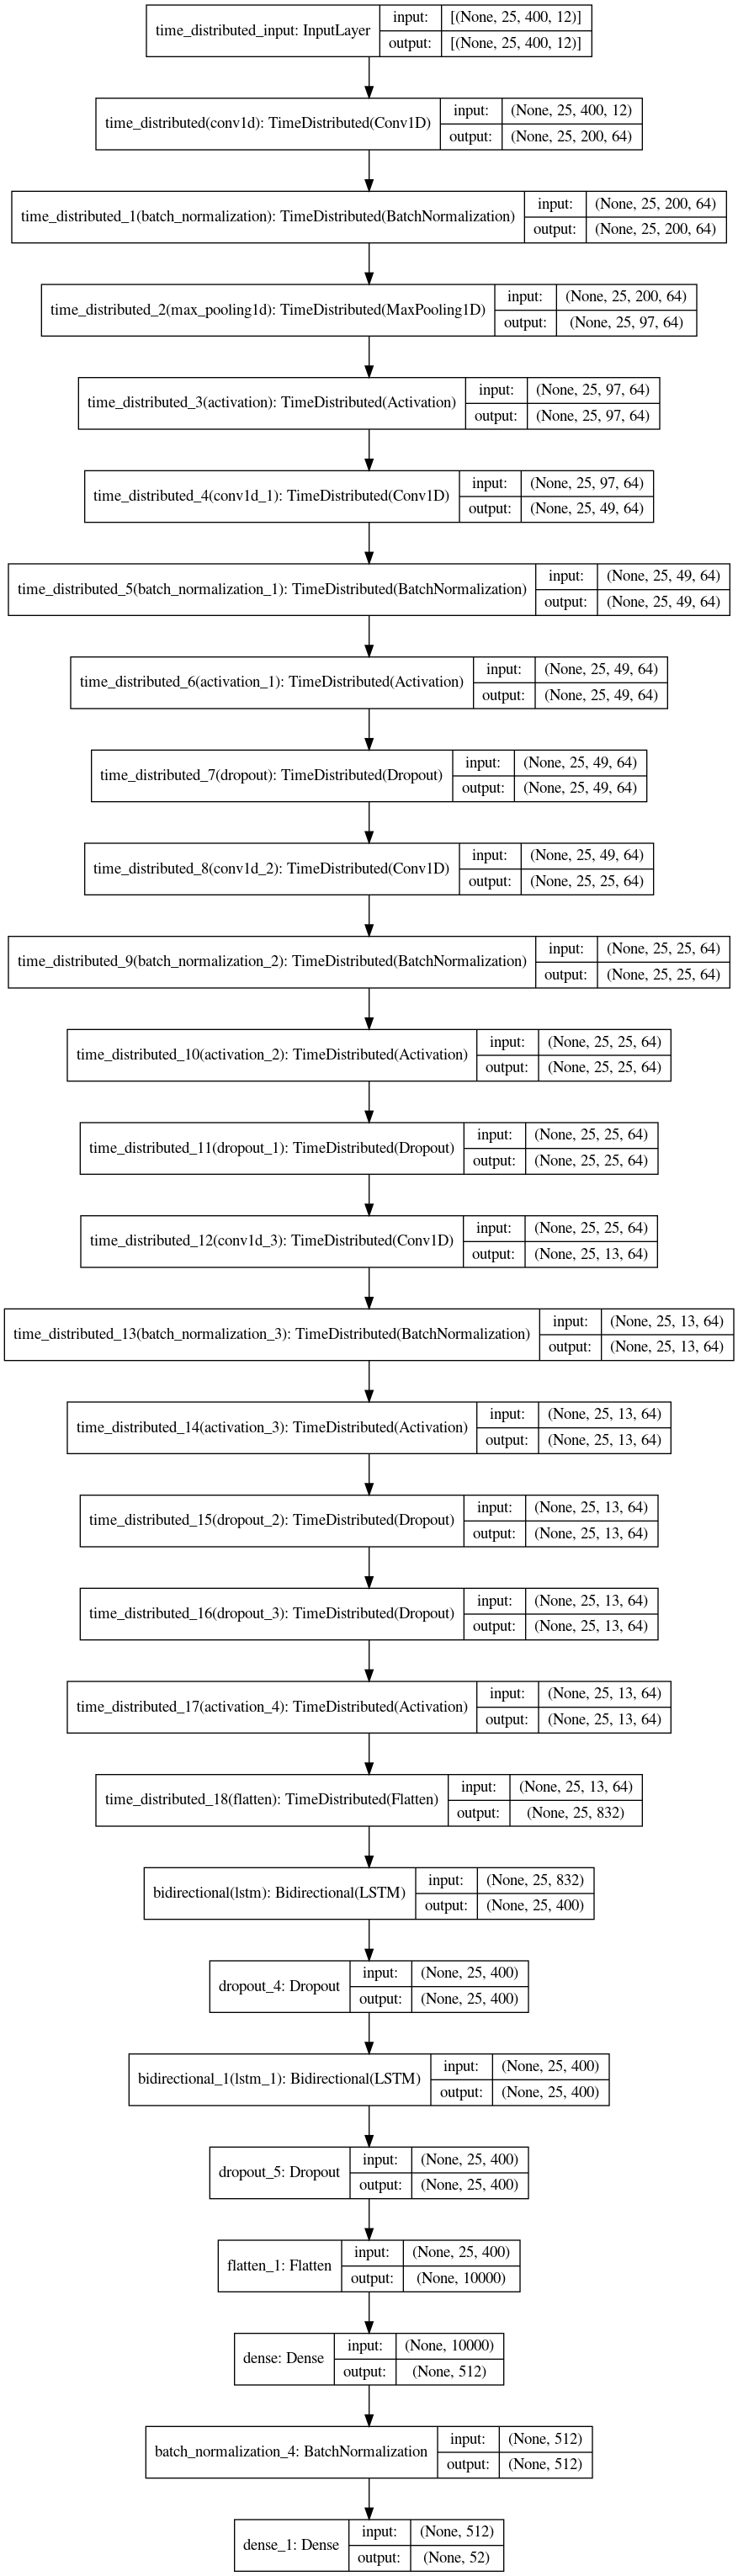

In [45]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [46]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/LSTM_nina_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot),verbose=1)

Epoch 1/200
130/130 [==============================] - 20s 79ms/step - loss: 5.1220 - accuracy: 0.0369 - val_loss: 4.1637 - val_accuracy: 0.0693

Epoch 00001: val_accuracy improved from -inf to 0.06930, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 2/200
130/130 [==============================] - 4s 28ms/step - loss: 3.5549 - accuracy: 0.0722 - val_loss: 3.4867 - val_accuracy: 0.1165

Epoch 00002: val_accuracy improved from 0.06930 to 0.11646, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 3/200
130/130 [==============================] - 4s 28ms/step - loss: 3.2449 - accuracy: 0.1531 - val_loss: 3.5367 - val_accuracy: 0.1261

Epoch 00003: val_accuracy improved from 0.11646 to 0.12608, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 4/200
130/130 [==============================] - 4s 29ms/step - loss:

130/130 [==============================] - 4s 28ms/step - loss: 0.1812 - accuracy: 0.9633 - val_loss: 1.8523 - val_accuracy: 0.6102

Epoch 00036: val_accuracy did not improve from 0.73725
Epoch 37/200
130/130 [==============================] - 4s 28ms/step - loss: 0.1546 - accuracy: 0.9734 - val_loss: 1.0721 - val_accuracy: 0.7546

Epoch 00037: val_accuracy improved from 0.73725 to 0.75457, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 38/200
130/130 [==============================] - 4s 28ms/step - loss: 0.1338 - accuracy: 0.9771 - val_loss: 1.7631 - val_accuracy: 0.6073

Epoch 00038: val_accuracy did not improve from 0.75457
Epoch 39/200
130/130 [==============================] - 4s 28ms/step - loss: 0.1517 - accuracy: 0.9662 - val_loss: 3.3776 - val_accuracy: 0.3763

Epoch 00039: val_accuracy did not improve from 0.75457
Epoch 40/200
130/130 [==============================] - 4s 28ms/step - loss: 0.1460 - accuracy: 0.97

Epoch 75/200
130/130 [==============================] - 4s 30ms/step - loss: 0.0636 - accuracy: 0.9966 - val_loss: 1.1090 - val_accuracy: 0.7623

Epoch 00075: val_accuracy did not improve from 0.76708
Epoch 76/200
130/130 [==============================] - 4s 30ms/step - loss: 0.0843 - accuracy: 0.9876 - val_loss: 1.1223 - val_accuracy: 0.7603

Epoch 00076: val_accuracy did not improve from 0.76708
Epoch 77/200
130/130 [==============================] - 4s 29ms/step - loss: 0.0708 - accuracy: 0.9913 - val_loss: 1.0958 - val_accuracy: 0.7623

Epoch 00077: val_accuracy did not improve from 0.76708
Epoch 78/200
130/130 [==============================] - 4s 29ms/step - loss: 0.0608 - accuracy: 0.9984 - val_loss: 1.0908 - val_accuracy: 0.7767

Epoch 00078: val_accuracy improved from 0.76708 to 0.77671, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 79/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0646 - a

130/130 [==============================] - 4s 28ms/step - loss: 0.0457 - accuracy: 0.9991 - val_loss: 1.0352 - val_accuracy: 0.7642

Epoch 00115: val_accuracy did not improve from 0.77671
Epoch 116/200
130/130 [==============================] - 4s 30ms/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 1.0345 - val_accuracy: 0.7767

Epoch 00116: val_accuracy did not improve from 0.77671
Epoch 117/200
130/130 [==============================] - 4s 29ms/step - loss: 0.0449 - accuracy: 0.9996 - val_loss: 1.0226 - val_accuracy: 0.7777

Epoch 00117: val_accuracy improved from 0.77671 to 0.77767, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 118/200
130/130 [==============================] - 4s 29ms/step - loss: 0.0454 - accuracy: 0.9986 - val_loss: 1.0299 - val_accuracy: 0.7661

Epoch 00118: val_accuracy did not improve from 0.77767
Epoch 119/200
130/130 [==============================] - 4s 29ms/step - loss: 0.0438 - accuracy: 

130/130 [==============================] - 4s 27ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 1.0234 - val_accuracy: 0.7767

Epoch 00153: val_accuracy did not improve from 0.78730
Epoch 154/200
130/130 [==============================] - 4s 27ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 1.0349 - val_accuracy: 0.7719

Epoch 00154: val_accuracy did not improve from 0.78730
Epoch 155/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 1.0302 - val_accuracy: 0.7738

Epoch 00155: val_accuracy did not improve from 0.78730
Epoch 156/200
130/130 [==============================] - 4s 27ms/step - loss: 0.0372 - accuracy: 0.9996 - val_loss: 1.0235 - val_accuracy: 0.7796

Epoch 00156: val_accuracy did not improve from 0.78730
Epoch 157/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0396 - accuracy: 0.9985 - val_loss: 1.0154 - val_accuracy: 0.7729

Epoch 00157: val_accuracy did not improve from 0.78730
Epoc


Epoch 00193: val_accuracy improved from 0.78730 to 0.78922, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/checkpoint.hdf5
Epoch 194/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0365 - accuracy: 0.9996 - val_loss: 1.0258 - val_accuracy: 0.7834

Epoch 00194: val_accuracy did not improve from 0.78922
Epoch 195/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0357 - accuracy: 0.9994 - val_loss: 1.0285 - val_accuracy: 0.7834

Epoch 00195: val_accuracy did not improve from 0.78922
Epoch 196/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 1.0282 - val_accuracy: 0.7738

Epoch 00196: val_accuracy did not improve from 0.78922
Epoch 197/200
130/130 [==============================] - 4s 28ms/step - loss: 0.0374 - accuracy: 0.9989 - val_loss: 1.0246 - val_accuracy: 0.7796

Epoch 00197: val_accuracy did not improve from 0.78922
Epoch 198/200
130/130 [====

In [47]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 193
train accuracy and validation accuracy 0.9990379810333252 0.78922039270401


In [48]:
model.save('/media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/CNN_LSTM_nina_100X100')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/CNN_LSTM_nina_100X100/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/prep_no_prep/CNN_LSTM100X100/CNN_LSTM_nina_100X100/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


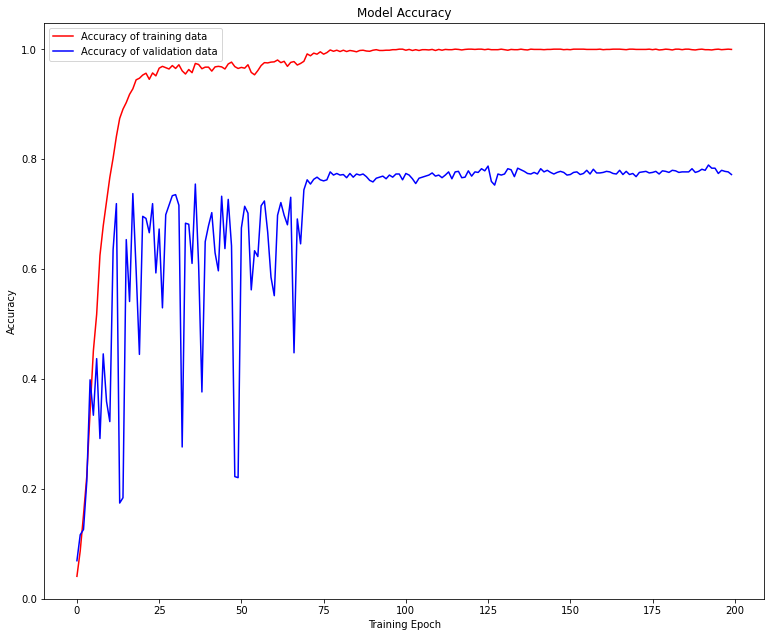

In [49]:
for i in history.history:
    print("history",i)
figDB4a=plt.figure(figsize=(10, 8),edgecolor='black')
ax= figDB4a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
ax.set(facecolor="white")
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


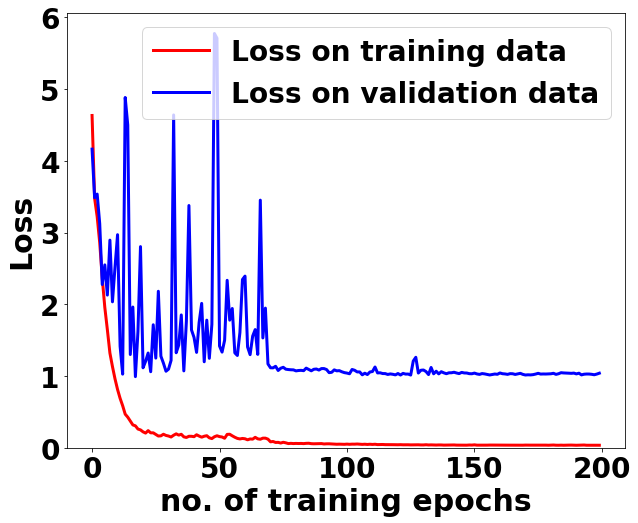

In [50]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figDB4.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figDB4=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figDB4.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for NinaPro DB4',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [51]:
# figDB4.savefig('/media/naveen/nav/plots/NinaPro_DB4_25X400.eps')
# figDB4.savefig('/media/naveen/nav/plots/NinaPro_DB4_25X400.pdf')

In [52]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

65/65 [==============================] - 1s 11ms/step - loss: 1.0166 - accuracy: 0.7892
test_accuracy 0.78922039270401


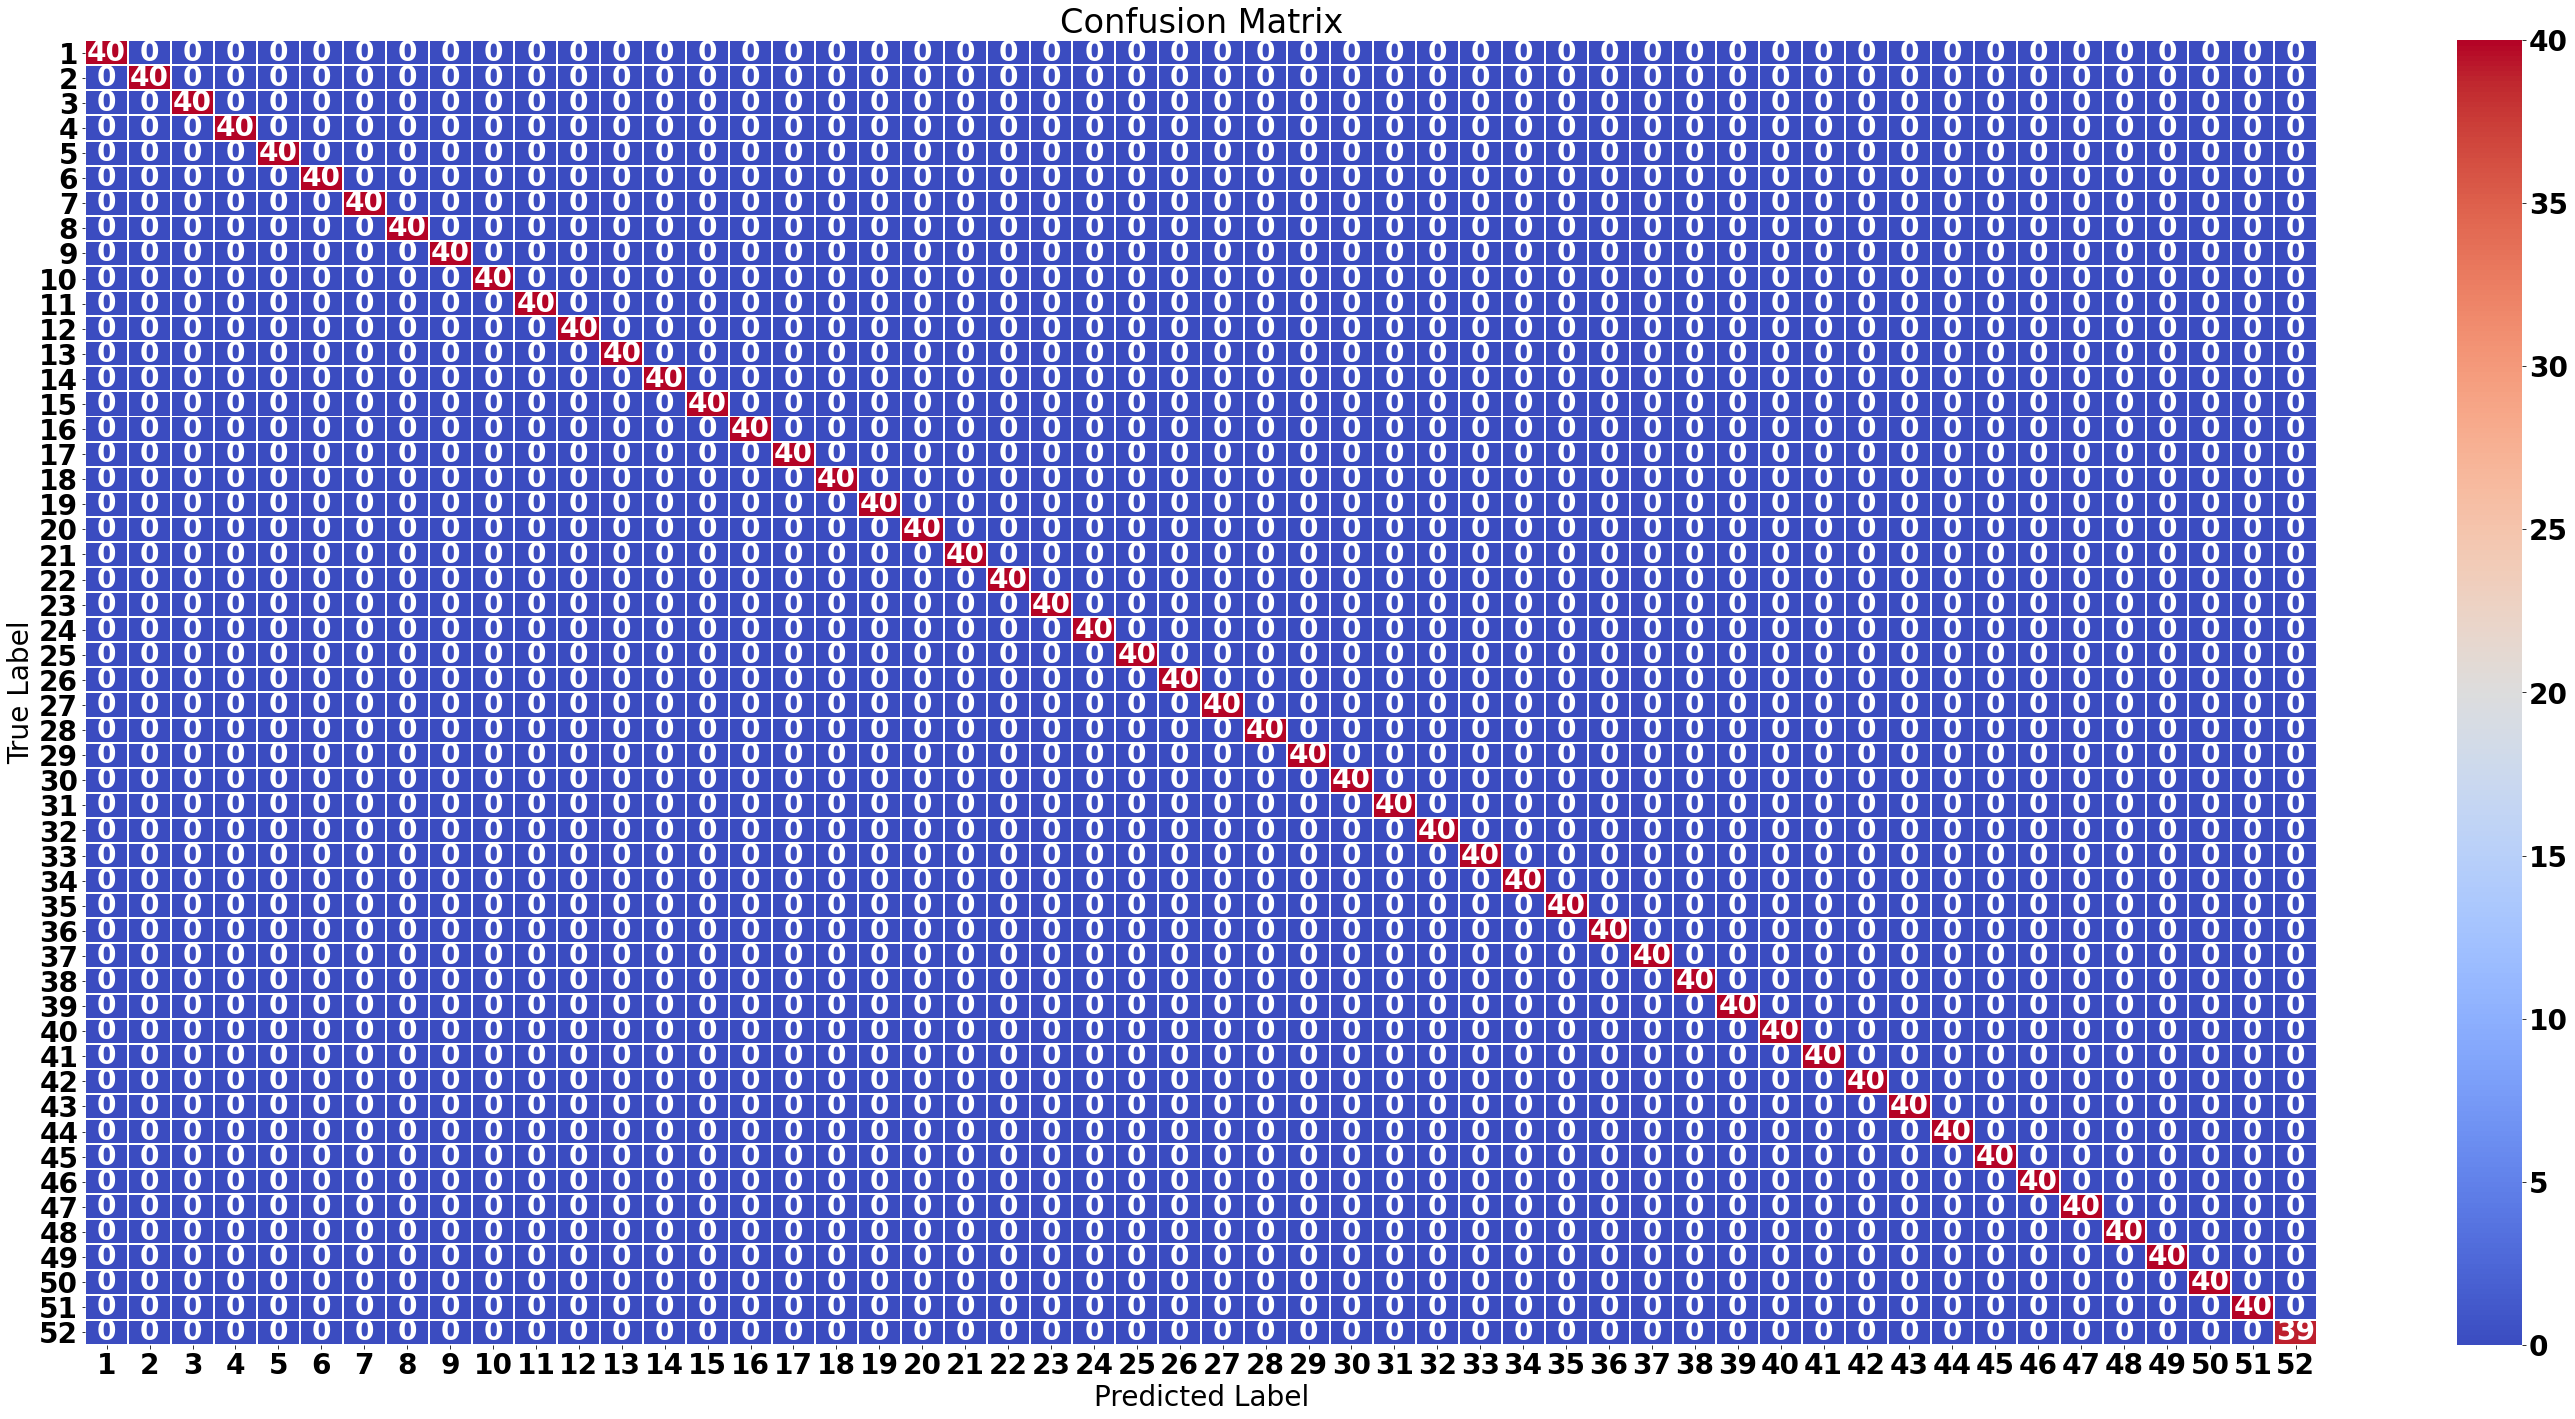

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        40
          17       1.00    

In [53]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

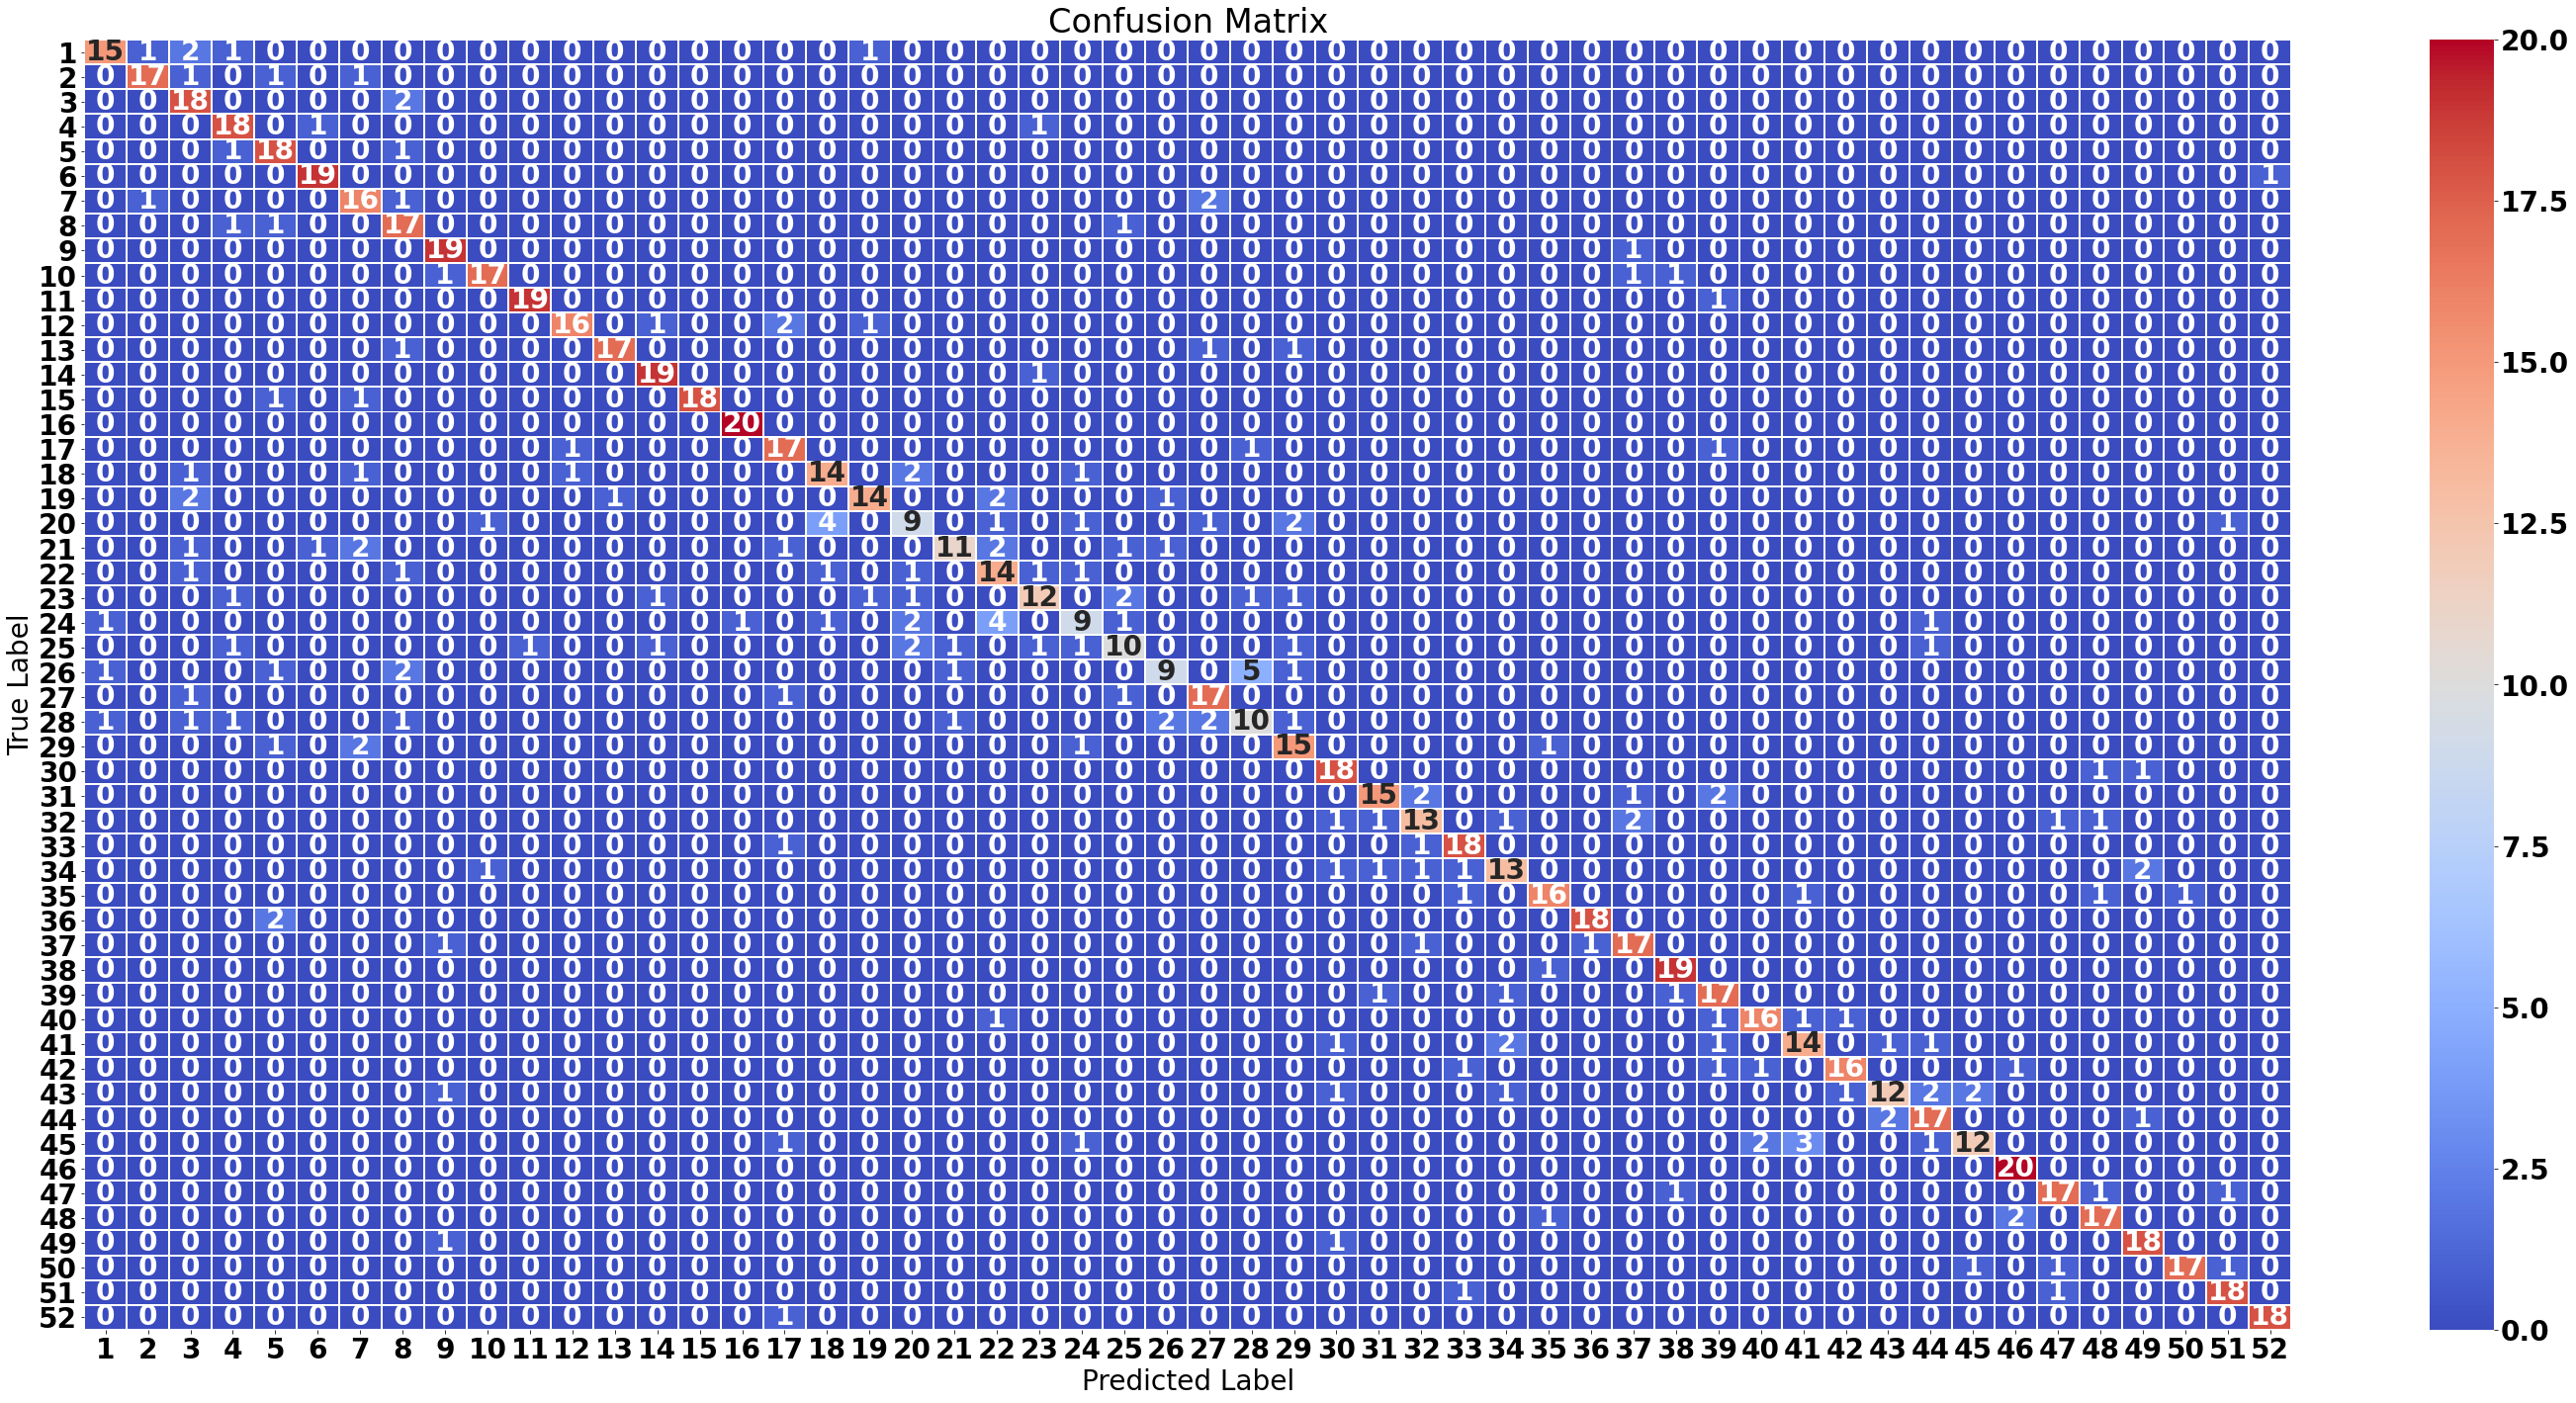

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.85      0.87        20
           2       0.64      0.90      0.75        20
           3       0.75      0.90      0.82        20
           4       0.72      0.90      0.80        20
           5       0.90      0.95      0.93        20
           6       0.70      0.80      0.74        20
           7       0.65      0.85      0.74        20
           8       0.83      0.95      0.88        20
           9       0.89      0.85      0.87        20
          10       0.95      0.95      0.95        20
          11       0.89      0.80      0.84        20
          12       0.94      0.85      0.89        20
          13       0.86      0.95      0.90        20
          14       1.00      0.90      0.95        20
          15       0.95      1.00      0.98        20
          16       0.71      0.85      0.77        20
          17       0.70    

In [54]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [55]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))